In [11]:
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv('/Users/anushakurra/Downloads/spam.csv', encoding='ISO-8859-1')

In [13]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3189,ham,Hi neva worry bout da truth coz the truth will...,NaN,NaN,NaN
209,ham,Both :) i shoot big loads so get ready!,NaN,NaN,NaN
1150,ham,(That said can you text him one more time?),NaN,NaN,NaN
4134,ham,No need to say anything to me. I know i am an ...,NaN,NaN,NaN
1637,spam,"0A$NETWORKS allow companies to bill for SMS, s...",just as a shop has to give a guarantee on wha...,NaN,NaN


In [14]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [17]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [18]:
df.sample(5)

,v1,v2
1831,ham,Hello- thanx for taking that call. I got a job...
928,ham,Oh all have to come ah?
1738,ham,K go and sleep well. Take rest:-).
1915,ham,Its not that time of the month nor mid of the ...
575,spam,"You have won ?1,000 cash or a ?2,000 prize! To..."


In [19]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5102,spam,This msg is for your mobile content order It h...
3850,ham,We have all rounder:)so not required:)
972,ham,Yup i thk so until e shop closes lor.
1293,ham,Happy birthday... May all ur dreams come true...
5111,ham,I've reached sch already...


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [21]:
df['target'] = encoder.fit_transform(df['target'])

In [22]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [24]:
# check for duplicate values
df.duplicated().sum()

403

In [25]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [26]:
df.duplicated().sum()

0

In [27]:
df.shape

(5169, 2)

## 2.Exploratory Data Analysis

In [28]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

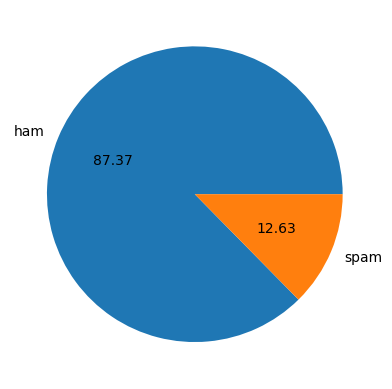

In [30]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [31]:
# Data is imbalanced

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anushakurra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
!pip install nltk

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anushakurra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
df['num_characters'] = df['text'].apply(len)

In [36]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [38]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [39]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [41]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [44]:
import seaborn as sns

/Users/anushakurra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anushakurra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

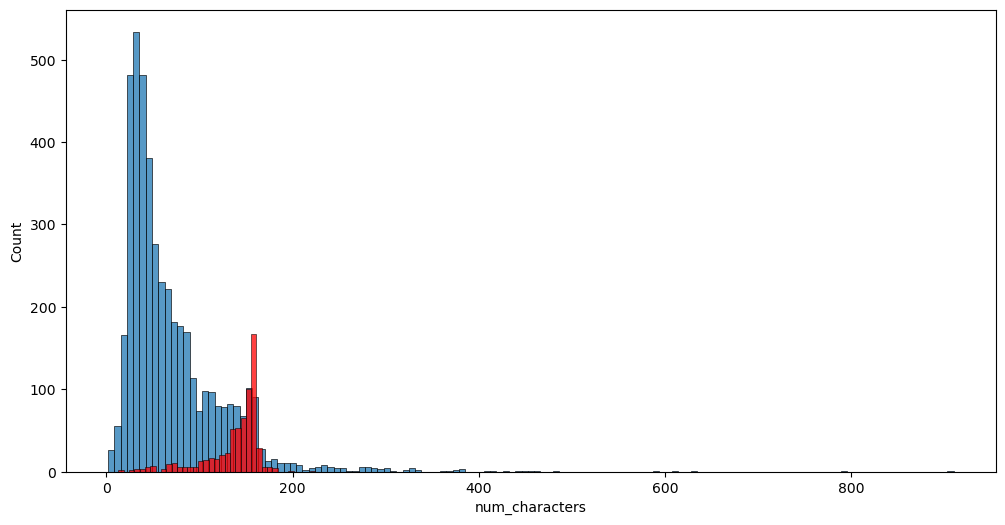

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

/Users/anushakurra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anushakurra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

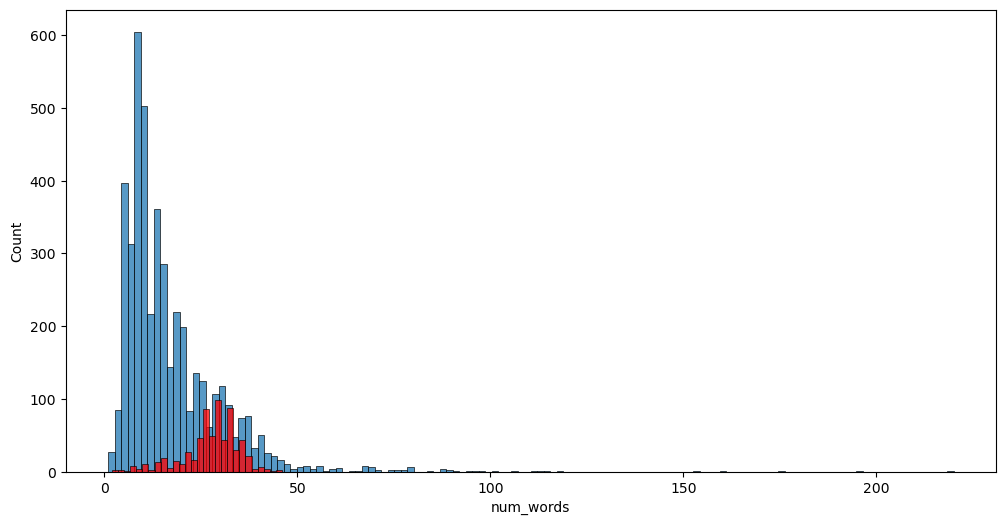

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

/Users/anushakurra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anushakurra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anushakurra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


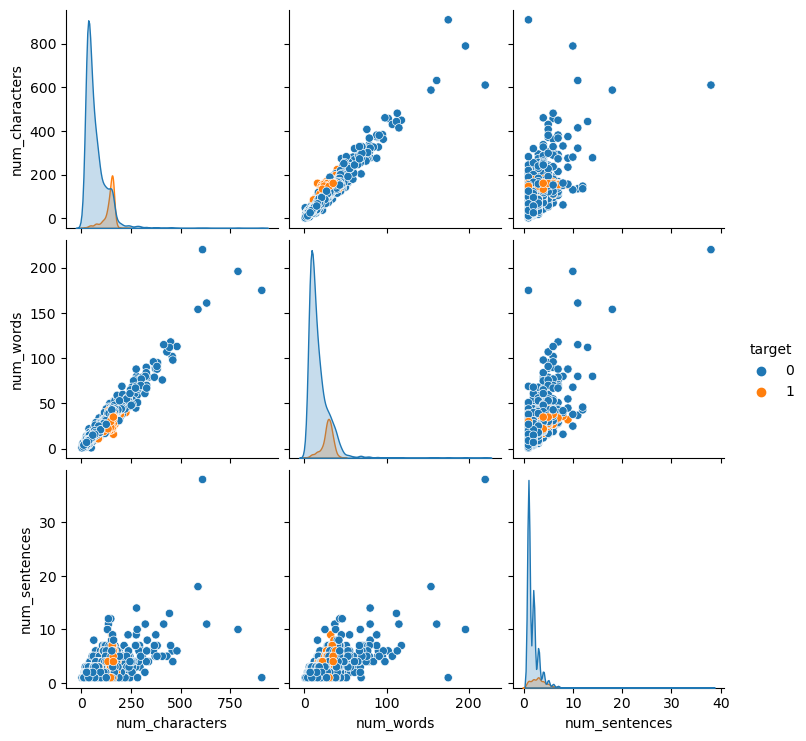

In [47]:
sns.pairplot(df,hue='target')

/var/folders/hm/wnrkmrx96yb50l0t9gf7cy4c0000gn/T/ipykernel_38344/2422388680.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if numeric_df.applymap(np.isreal).all().all():


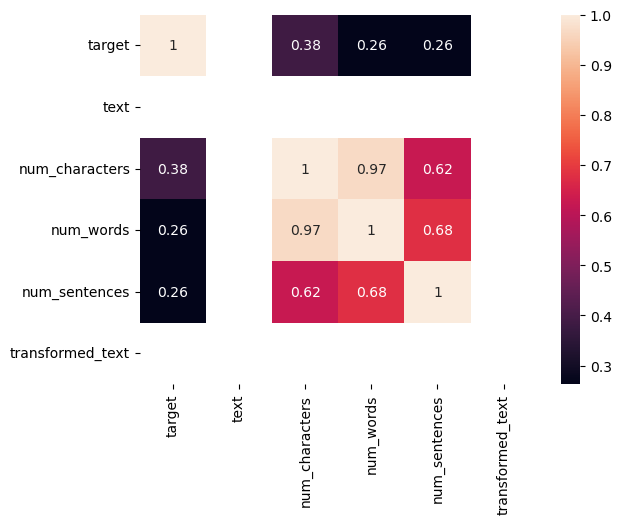

In [98]:
# sns.heatmap(df.corr(),annot=True)
# Assuming 'df' is your DataFrame containing both numeric and string columns

# Convert non-numeric columns to numeric, or drop them if not relevant
numeric_df = df.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='all')

# Now, check if all values in the DataFrame are numeric
if numeric_df.applymap(np.isreal).all().all():
    # All values are numeric, so it's safe to compute correlation and plot heatmap
    sns.heatmap(numeric_df.corr(), annot=True)
    plt.show()
else:
    print("DataFrame contains non-numeric values.")


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [49]:
from nltk.stem.porter import PorterStemmer


ps = PorterStemmer()
ps.stem('loving')

'love'

In [50]:
import string
from nltk.corpus import stopwords
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [51]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [52]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [53]:
df['transformed_text'] = df['text'].apply(transform_text)

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
pip install wordCloud

Note: you may need to restart the kernel to use updated packages.


In [56]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [57]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

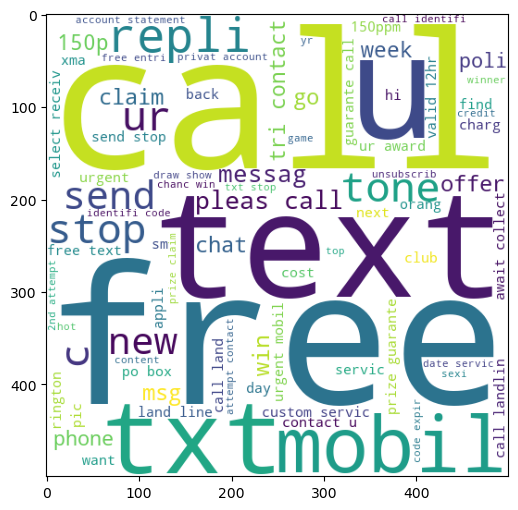

In [58]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [59]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

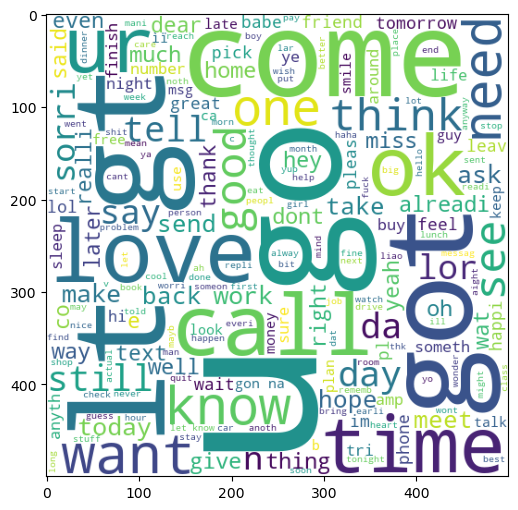

In [60]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [61]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [62]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [63]:
len(spam_corpus)

9939

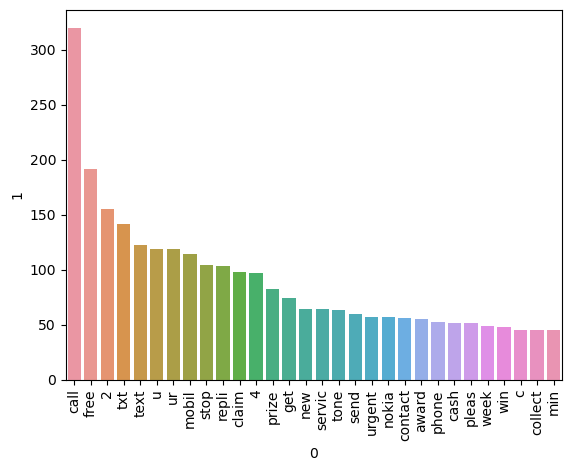

In [68]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming spam_corpus is a list of words in spam messages
# Counter(spam_corpus).most_common(30) returns the 30 most common words in the spam_corpus along with their frequencies
# Converting the Counter object to a DataFrame to use with sns.barplot
data = pd.DataFrame(Counter(spam_corpus).most_common(30))

# The first column (index 0) contains the words, and the second column (index 1) contains their frequencies
# We need to pass these columns separately to sns.barplot
sns.barplot(x=data[0], y=data[1])
plt.xticks(rotation='vertical')
plt.show()


In [69]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [70]:
len(ham_corpus)

35404

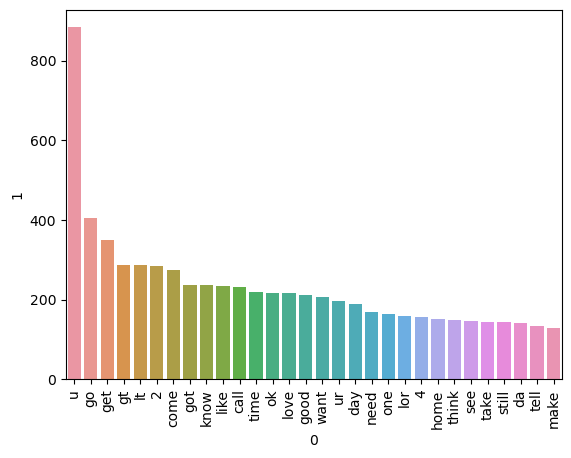

In [72]:
from collections import Counter

data = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=data[0], y=data[1])
# sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [73]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [74]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [75]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [76]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [77]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [78]:
X.shape

(5169, 3000)

In [79]:
y = df['target'].values

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [82]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [83]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [109]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred1)*100)
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred1))
print("Precision:",precision_score(y_test,y_pred1)*100)

Accuracy: 86.94390715667312
Confusion Matrix:
[[788 108]
 [ 27 111]]
Precision: 50.68493150684932


In [110]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred2)*100)
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred2))
print("Precision:",precision_score(y_test,y_pred2)*100)

Accuracy: 97.09864603481626
Confusion Matrix:
[[896   0]
 [ 30 108]]
Precision: 100.0


In [111]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred3)*100)
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred3))
print("Precision:",precision_score(y_test,y_pred3)*100)

Accuracy: 98.35589941972921
Confusion Matrix:
[[895   1]
 [ 16 122]]
Precision: 99.1869918699187


In [87]:
# tfidf --> MNB

In [88]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [134]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [135]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
}

In [136]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    precision = precision_score(y_test,y_pred)*100
    
    return accuracy,precision

In [137]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(97.58220502901354, 97.47899159663865)

In [138]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  97.58220502901354
Precision -  97.47899159663865
For  KN
Accuracy -  90.52224371373308
Precision -  100.0
For  NB
Accuracy -  97.09864603481626
Precision -  100.0
For  DT
Accuracy -  92.84332688588007
Precision -  82.0
For  LR
Accuracy -  95.84139264990328
Precision -  97.02970297029702
For  RF
Accuracy -  97.58220502901354
Precision -  98.29059829059828


In [139]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [140]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,90.522244,100.000000
2,NB,97.098646,100.000000
5,RF,97.582205,98.290598
0,SVC,97.582205,97.478992
4,LR,95.841393,97.029703
3,DT,92.843327,82.000000


In [141]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [142]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,90.522244
1,NB,Accuracy,97.098646
2,RF,Accuracy,97.582205
3,SVC,Accuracy,97.582205
4,LR,Accuracy,95.841393
5,DT,Accuracy,92.843327
6,KN,Precision,100.000000
7,NB,Precision,100.000000
8,RF,Precision,98.290598
9,SVC,Precision,97.478992


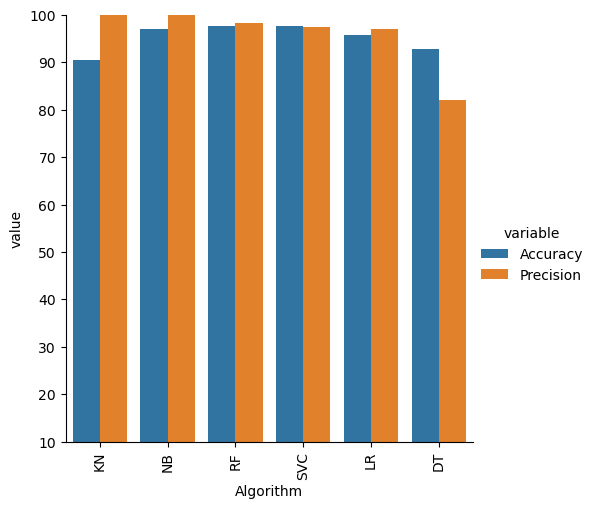

In [164]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(10,100)
plt.xticks(rotation='vertical')
plt.show()

In [144]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [145]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [146]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [147]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [148]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [149]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [150]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,90.522244,100.000000,90.522244,100.000000,90.522244,100.000000,90.522244,100.000000
1,NB,97.098646,100.000000,97.098646,100.000000,97.098646,100.000000,97.098646,100.000000
2,RF,97.582205,98.290598,97.582205,98.290598,97.582205,98.290598,97.582205,98.290598
3,SVC,97.582205,97.478992,97.582205,97.478992,97.582205,97.478992,97.582205,97.478992
4,LR,95.841393,97.029703,95.841393,97.029703,95.841393,97.029703,95.841393,97.029703
5,DT,92.843327,82.000000,92.843327,82.000000,92.843327,82.000000,92.843327,82.000000


In [151]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [152]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [153]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [154]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [155]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [156]:
from sklearn.ensemble import StackingClassifier

In [157]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [158]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9615384615384616


In [86]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))